In [ ]:
#크롤링 정책
# robots.txt: 웹페이지의 크롤링 정책 설명한 페이지
#ex) https://www.ted.com/robots.txt
#크롤링법은 없다. 하지만 과도한 크롤링으로 서비스에 영향을 주었ㅇ르 경우 업무방해 혐의로 고소 당할 수 있다.
#법정문제: 지적재산권, 서비스과부화, 데이터사용표준
# API 사용: 데이터를 가지고 있는 업체에서 데이터를 가져갈 수 있도록 하는 서비스


### Naver Rest API
- 파파고 번역 api
- 통합검색어 트렌드 api

In [1]:
import pandas as pd
import requests, json

#### 0. request token 얻기
- `https://developers.naver.com`
- 1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
- 2. app_key를 이용해서 데이터 가져오기

In [2]:
CLIENT_ID = 'NILfY7Iv8NCrOArn6g9i'
CLIENT_SECRET ='7pG0_eVO_J'

#### 1. 파파고 번역 api
- `https://developers.naver.com/docs/papago/`
- 사용법
    - `https://developers.naver.com/docs/papago/papago-nmt-api-reference.md`

In [3]:
#1. API 문서: URL
ko_txt = '아 배고파'
url = f'https://openapi.naver.com/v1/papago/n2mt'
headers={
    'Content-Type': 'application/json',
    'X-Naver-Client-Id': CLIENT_ID,
    'X-Naver-Client-Secret': CLIENT_SECRET
}
params={'source': 'ko', 'target': 'en', 'text': ko_txt}

In [4]:
#2. request(URL, key, ko_txt) > response: json(str)
json.dumps(params) # 한국어 전송을 위해 영문,특수문자 형태로 변환(인코딩)해서 전송, 한글 데이터 활용시 필요
response = requests.post(url, json.dumps(params),headers=headers)  #200번 나오면 정상 작동
response

<Response [200]>

In [5]:
response.text

'{"message":{"result":{"srcLangType":"ko","tarLangType":"en","translatedText":"Oh, I\'m hungry.","engineType":"N2MT","pivot":null,"dict":null,"tarDict":null,"modelVer":"1.5.8|enko.2022.0929.03|koen.2022.1206.02"},"@type":"response","@service":"naverservice.nmt.proxy","@version":"1.0.0"}}'

In [6]:
#3. json(str): en_text
response.json()['message']['result']['translatedText']

"Oh, I'm hungry."

In [7]:
# MakeFunction
def translate(txt, source='ko', target='en'):
    CLIENT_ID = 'NILfY7Iv8NCrOArn6g9i'
    CLIENT_SECRET ='7pG0_eVO_J'
    url = f'https://openapi.naver.com/v1/papago/n2mt'
    headers={
    'Content-Type': 'application/json',
    'X-Naver-Client-Id': CLIENT_ID,
    'X-Naver-Client-Secret': CLIENT_SECRET
}
    params={'source': 'ko', 'target': 'en', 'text': txt}
    response = requests.post(url, json.dumps(params),headers=headers)
    return response.json()['message']['result']['translatedText']

In [8]:
translate('데이터 사이언스는 재미있습니다.')

'Data Science is fun.'

In [9]:
df=pd.DataFrame({
    'id': list('AB'),
    'title': ['인공지능 스쿨 화이팅', '데이터 크롤링']
})
df

,id,title
0,A,인공지능 스쿨 화이팅
1,B,데이터 크롤링


In [10]:
df['en_title']=df['title'].apply(translate)
df

,id,title,en_title
0,A,인공지능 스쿨 화이팅,"AI school, fighting!"
1,B,데이터 크롤링,Crawling data


In [ ]:
df.to_excel('en_title.xlsx', index=False, encoding='utf-8-sig')

In [ ]:
%ls

#### 2. 통합검색어 트렌드 api
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`

In [13]:
# 현재 선언 되어있는 변수 확인
%whos

Interactive namespace is empty.


In [14]:
# 현재 선언되어있는 변수 초기화
%reset

In [52]:
CLIENT_ID = 'NILfY7Iv8NCrOArn6g9i'
CLIENT_SECRET ='7pG0_eVO_J'

In [59]:
#1. API 문서: URL
url = 'https://openapi.naver.com/v1/datalab/search'
params ={
    'startDate': '2018-01-01',
    'endDate': '2023-02-16',
    'timeUnit': 'month',
    'keywordGroups': [
        {'groupName': '트위터','keywords': ['트위터','트윗']},
        {'groupName': '페이스북','keywords': ['페이스북','페북']},
        {'groupName': '인스타그램','keywords': ['인스타그램','인스타']}
        ]
}

In [60]:
headers={
    'Content-Type': 'application/json',
    'X-Naver-Client-Id': CLIENT_ID,
    'X-Naver-Client-Secret': CLIENT_SECRET
}

In [61]:
#2. request(URL) > response: json(str) : 데이터 요청
response = requests.post(url, json.dumps(params), headers=headers)
response

<Response [200]>

In [63]:
#3. json(str) > list, dict > DataFrame : 
response.text

'{"startDate":"2018-01-01","endDate":"2023-02-16","timeUnit":"month","results":[{"title":"트위터","keywords":["트위터","트윗"],"data":[{"period":"2018-01-01","ratio":14.59502},{"period":"2018-02-01","ratio":13.0238},{"period":"2018-03-01","ratio":12.97953},{"period":"2018-04-01","ratio":12.82991},{"period":"2018-05-01","ratio":13.05391},{"period":"2018-06-01","ratio":13.34512},{"period":"2018-07-01","ratio":13.02773},{"period":"2018-08-01","ratio":13.45399},{"period":"2018-09-01","ratio":12.83755},{"period":"2018-10-01","ratio":13.05677},{"period":"2018-11-01","ratio":12.77338},{"period":"2018-12-01","ratio":12.86931},{"period":"2019-01-01","ratio":13.31172},{"period":"2019-02-01","ratio":11.74776},{"period":"2019-03-01","ratio":11.82313},{"period":"2019-04-01","ratio":12.32991},{"period":"2019-05-01","ratio":12.43771},{"period":"2019-06-01","ratio":13.29913},{"period":"2019-07-01","ratio":14.00593},{"period":"2019-08-01","ratio":14.208},{"period":"2019-09-01","ratio":14.00856},{"period":"2019

In [64]:
response.json() #리스트 타입으로 변경

{'startDate': '2018-01-01',
 'endDate': '2023-02-16',
 'timeUnit': 'month',
 'results': [{'title': '트위터',
   'keywords': ['트위터', '트윗'],
   'data': [{'period': '2018-01-01', 'ratio': 14.59502},
    {'period': '2018-02-01', 'ratio': 13.0238},
    {'period': '2018-03-01', 'ratio': 12.97953},
    {'period': '2018-04-01', 'ratio': 12.82991},
    {'period': '2018-05-01', 'ratio': 13.05391},
    {'period': '2018-06-01', 'ratio': 13.34512},
    {'period': '2018-07-01', 'ratio': 13.02773},
    {'period': '2018-08-01', 'ratio': 13.45399},
    {'period': '2018-09-01', 'ratio': 12.83755},
    {'period': '2018-10-01', 'ratio': 13.05677},
    {'period': '2018-11-01', 'ratio': 12.77338},
    {'period': '2018-12-01', 'ratio': 12.86931},
    {'period': '2019-01-01', 'ratio': 13.31172},
    {'period': '2019-02-01', 'ratio': 11.74776},
    {'period': '2019-03-01', 'ratio': 11.82313},
    {'period': '2019-04-01', 'ratio': 12.32991},
    {'period': '2019-05-01', 'ratio': 12.43771},
    {'period': '2019-06-

In [79]:
results = response.json()['results']
type(results)

list

In [81]:
# columns : period, ratio, title
dfs = []
for result in results:
    df = pd.DataFrame(result['data'])
    df['title'] = result['title']
    dfs.append(df)


In [87]:
dfs[0]

,period,ratio,title
0,2018-01-01,14.59502,트위터
1,2018-02-01,13.02380,트위터
2,2018-03-01,12.97953,트위터
3,2018-04-01,12.82991,트위터
4,2018-05-01,13.05391,트위터
...,...,...,...
57,2022-10-01,27.11456,트위터
58,2022-11-01,25.41930,트위터
59,2022-12-01,25.55513,트위터
60,2023-01-01,26.64944,트위터


In [86]:
#데이터 프레임 3개 결합하기
result_df = pd.concat(dfs, ignore_index=True)
result_df.tail(2)

,period,ratio,title
184,2023-01-01,20.30135,인스타그램
185,2023-02-01,10.55313,인스타그램


In [88]:
# 시각화: 꺾은선 그래프로 만들어주기
# column: title(twitter, facebook, instagram)
# index: period
# value: ratio

In [92]:
pivot_df = result_df.pivot('period', 'title', 'ratio')
pivot_df 

title,인스타그램,트위터,페이스북
period,,,
2018-01-01,23.41982,14.59502,97.80481
2018-02-01,22.53544,13.02380,89.05814
2018-03-01,25.39880,12.97953,98.84292
2018-04-01,26.55983,12.82991,100.00000
2018-05-01,28.60035,13.05391,92.23588
...,...,...,...
2022-10-01,23.38901,27.11456,16.73444
2022-11-01,21.51581,25.41930,15.12064
2022-12-01,20.33907,25.55513,14.72503


In [94]:
# update: 데이터선택 = 수정할 데이터
pivot_df.columns = ['instagram', 'twitter', 'facebook']

In [95]:
pivot_df

,instagram,twitter,facebook
period,,,
2018-01-01,23.41982,14.59502,97.80481
2018-02-01,22.53544,13.02380,89.05814
2018-03-01,25.39880,12.97953,98.84292
2018-04-01,26.55983,12.82991,100.00000
2018-05-01,28.60035,13.05391,92.23588
...,...,...,...
2022-10-01,23.38901,27.11456,16.73444
2022-11-01,21.51581,25.41930,15.12064
2022-12-01,20.33907,25.55513,14.72503


In [97]:
import matplotlib.pyplot as plt

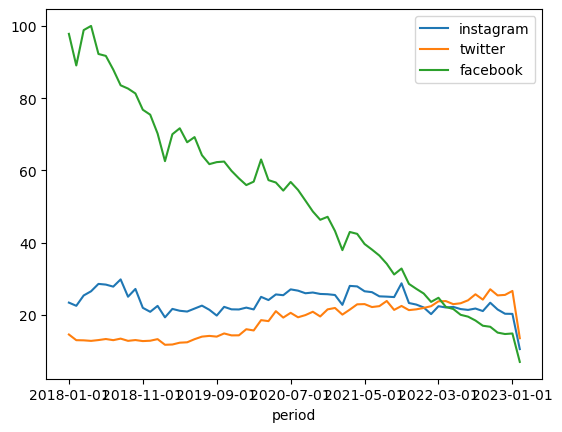

In [99]:
pivot_df.plot()
plt.show()

In [104]:
#그래프 선명하게 만들기
%config InlineBackend.figure_format = {'png', 'retina'}

ERROR:root:The 'figure_format' trait of an InlineBackend instance expected a unicode string, not the tuple ('png', 'retina').


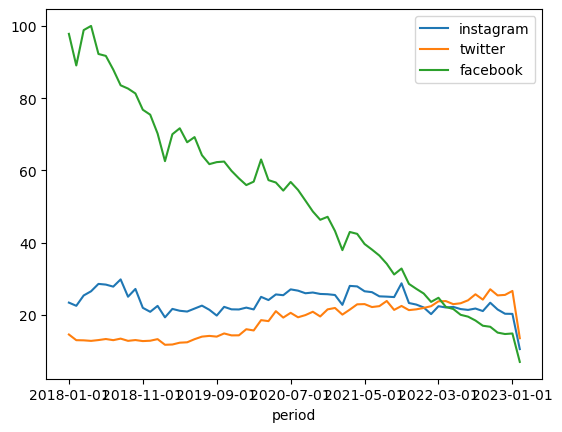

In [105]:
pivot_df.plot()
plt.show()

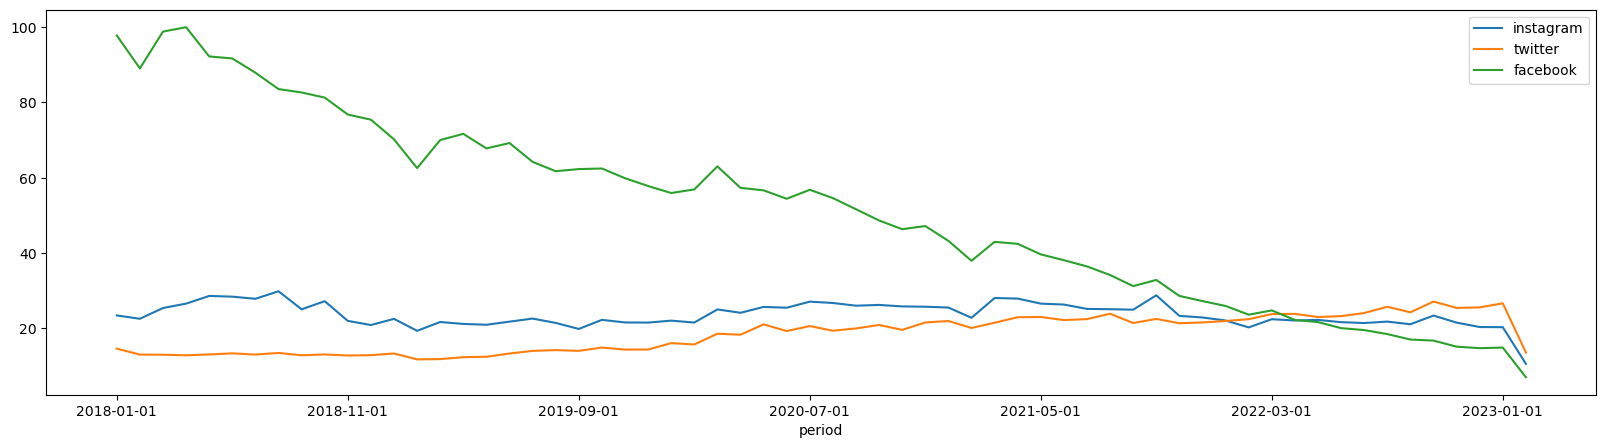

In [103]:
pivot_df.plot(figsize=(20, 5))
plt.show()

In [ ]:
'''
api 사용해서 데이터를 사용하는 방법
api 키 값을 먼저 받는다
document를 보고 url 찾는다, api 아닌 동적 페이지 수집은 key값 필요없이 네트워크 트레픽 확인
api는 도큐먼트에서 찾는다는게 차이점

동적 페이지 수집과 api 수집은 거의 유사하다.
'''